# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* 75 баллов


<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* 75 баллов






-----

### *Профиль физика*
Набор данных суперсимметрии поддерживает двоичную классификацию событий столкновений в физике элементарных частиц на основе собранных особенностей столкновений. Вам будет необходимо научиться предсказывать вид события в зависимости от физических параметров частиц после столкновения.

Данные состоят из следующих функций:

*   `target class` : метки классов, где 0 - фоновое событие, 1 - суперсимметричное событие.
*   `L1pT` : импульс, поперечный лучу лептона 1
*   `L1eta` : псевдобыстрота лептона 1
*   `L1phi` : азимутальный угол лептона 1
*   `L2pT` : импульс, поперечный лучу лептона 2
*   `L2eta` : псевдобыстрота лептона 2
*   `L2phi` : азимутальный угол лептона 2
*   `missing energy magnitude` : количество недостающего поперечного импульса
*   `missing energy phi` : азимутальный угол недостающего поперечного импульса

Остальные 10 признаков получены из первых 8 непосредственно измеренных признаков. Эти последние 10 функций — это функции, которые физики элементарных частиц разработали для улучшения своей задачи по обнаружению событий. Подробнее про оригинальное исследование можете посмотреть в прикрепленной статье.


*Суперсимметрия — это теоретическая основа физики элементарных частиц, которая предлагает принцип симметрии, связывающий фермионы (частицы с полуцелым спином) и бозоны (частицы с целым спином). Эта инновационная теория вводит концепцию суперсимметричного партнера для каждой известной элементарной частицы, которая отличается по спину на 1/2, но имеет другие фундаментальные свойства, такие как заряд и масса.*


### *Профиль биология*

Набор данных включает 171 молекулу, предназначенную для функциональных доменов белка CRY1, ответственного за формирование циркадного ритма. 56 молекул токсичны, а остальные нетоксичны.

Полученные данные представляют собой полный набор из 1203 молекулярных дескрипторов.

Данное домашнее задание имеет свободную форму, то есть вашей задачей будет для каждого класса моделей получить лучший результат и после выбрать наилучшую модель. Метрика для задачи - `from sklearn.metrics import f1_score`. Работа будет оцениваться по следующим ключевым пунктам:


1.   Предвартельный анализ данных
2.   Предобработка данных
  1.   Обработка пропусков
  2.   Обработка выбросов

3.   Реализация моделей
  1.  Дерево
  2.  Лес
  3.  Логистическая регрессия
  4.  KNN
  5.  MLP



## Предварительный анализ данных

In [267]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
import graphviz


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_absolute_percentage_error

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from IPython.display import clear_output
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

В этом разделе ожидается, что вы посмотрите на распределение признаков и классов, изучите их связь, проанализируете признаки на наличие в них пропусков или выбросов.

In [2]:
df = pd.read_csv("C:/Users/админ/Desktop/МатСтаты/датасеты/data_bio.csv")

In [3]:
df

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


In [4]:
(df.isna().sum() !=0).sum()

0

Пропусков нет, либо их обозначают по-другому

<Axes: xlabel='Class', ylabel='Count'>

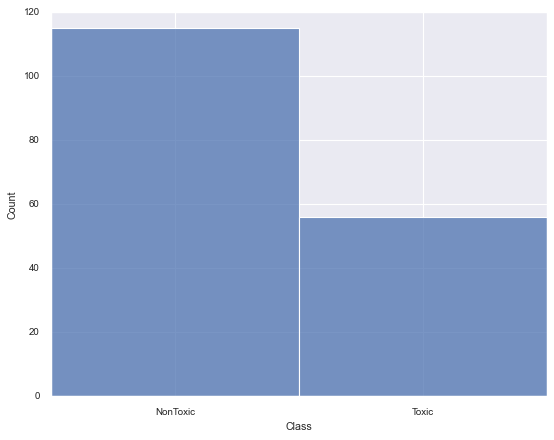

In [108]:
sns.histplot(df.Class)

Как видно, нетоксичных молекул больше в 2 раза

Выделим признаки, которые указаны в статье, пропустив перебор признаков и кросс-валидацию.

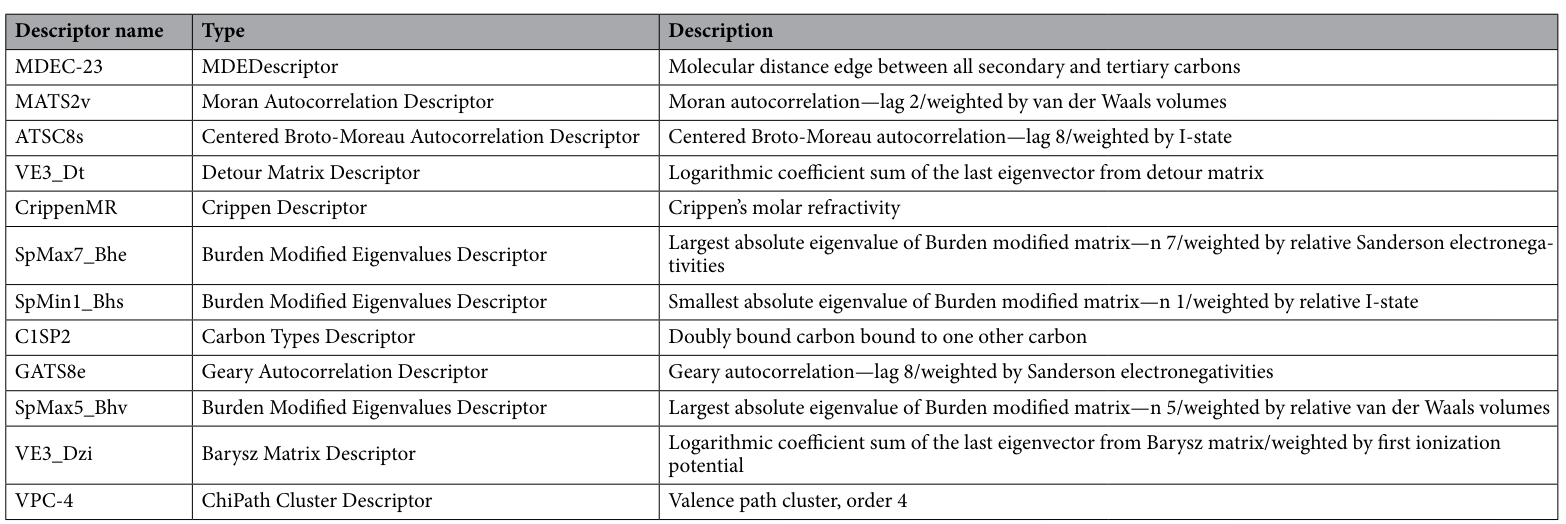

In [5]:
features = ['MDEC-23', 'MATS2v', 'ATSC8s', 'VE3_Dt', 'CrippenMR', 'SpMax7_Bhe', 'SpMin1_Bhs', 'C1SP2', 'GATS8e', 'SpMax5_Bhv', 'VE3_Dzi', 'VPC-4']

In [6]:
df = df[features+['Class']]
df

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,SpMax5_Bhv,VE3_Dzi,VPC-4,Class
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,3.5545,-15.5940,4.1692,NonToxic
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,3.6066,-14.3317,2.0821,NonToxic
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,3.6441,-25.4493,2.8730,NonToxic
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,3.6564,-19.6376,3.0444,NonToxic
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,3.5216,-8.2157,2.9469,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.6305,-0.1231,-3.1521,-2.9706,71.9807,2.4269,2.0708,1,1.0932,2.8103,-4.3924,0.7136,NonToxic
167,33.1806,-0.0486,-7.2825,-4.0095,125.0777,3.0040,2.0701,3,1.0687,3.2560,-4.4435,1.6616,NonToxic
168,28.3570,-0.0726,8.0017,-3.2338,133.7697,3.2468,1.9242,2,1.3249,3.2822,-5.5907,1.9339,NonToxic
169,26.4286,0.0420,-32.5992,-7.0649,144.0674,3.2089,1.9162,4,1.3001,3.2904,-3.5370,2.0526,Toxic


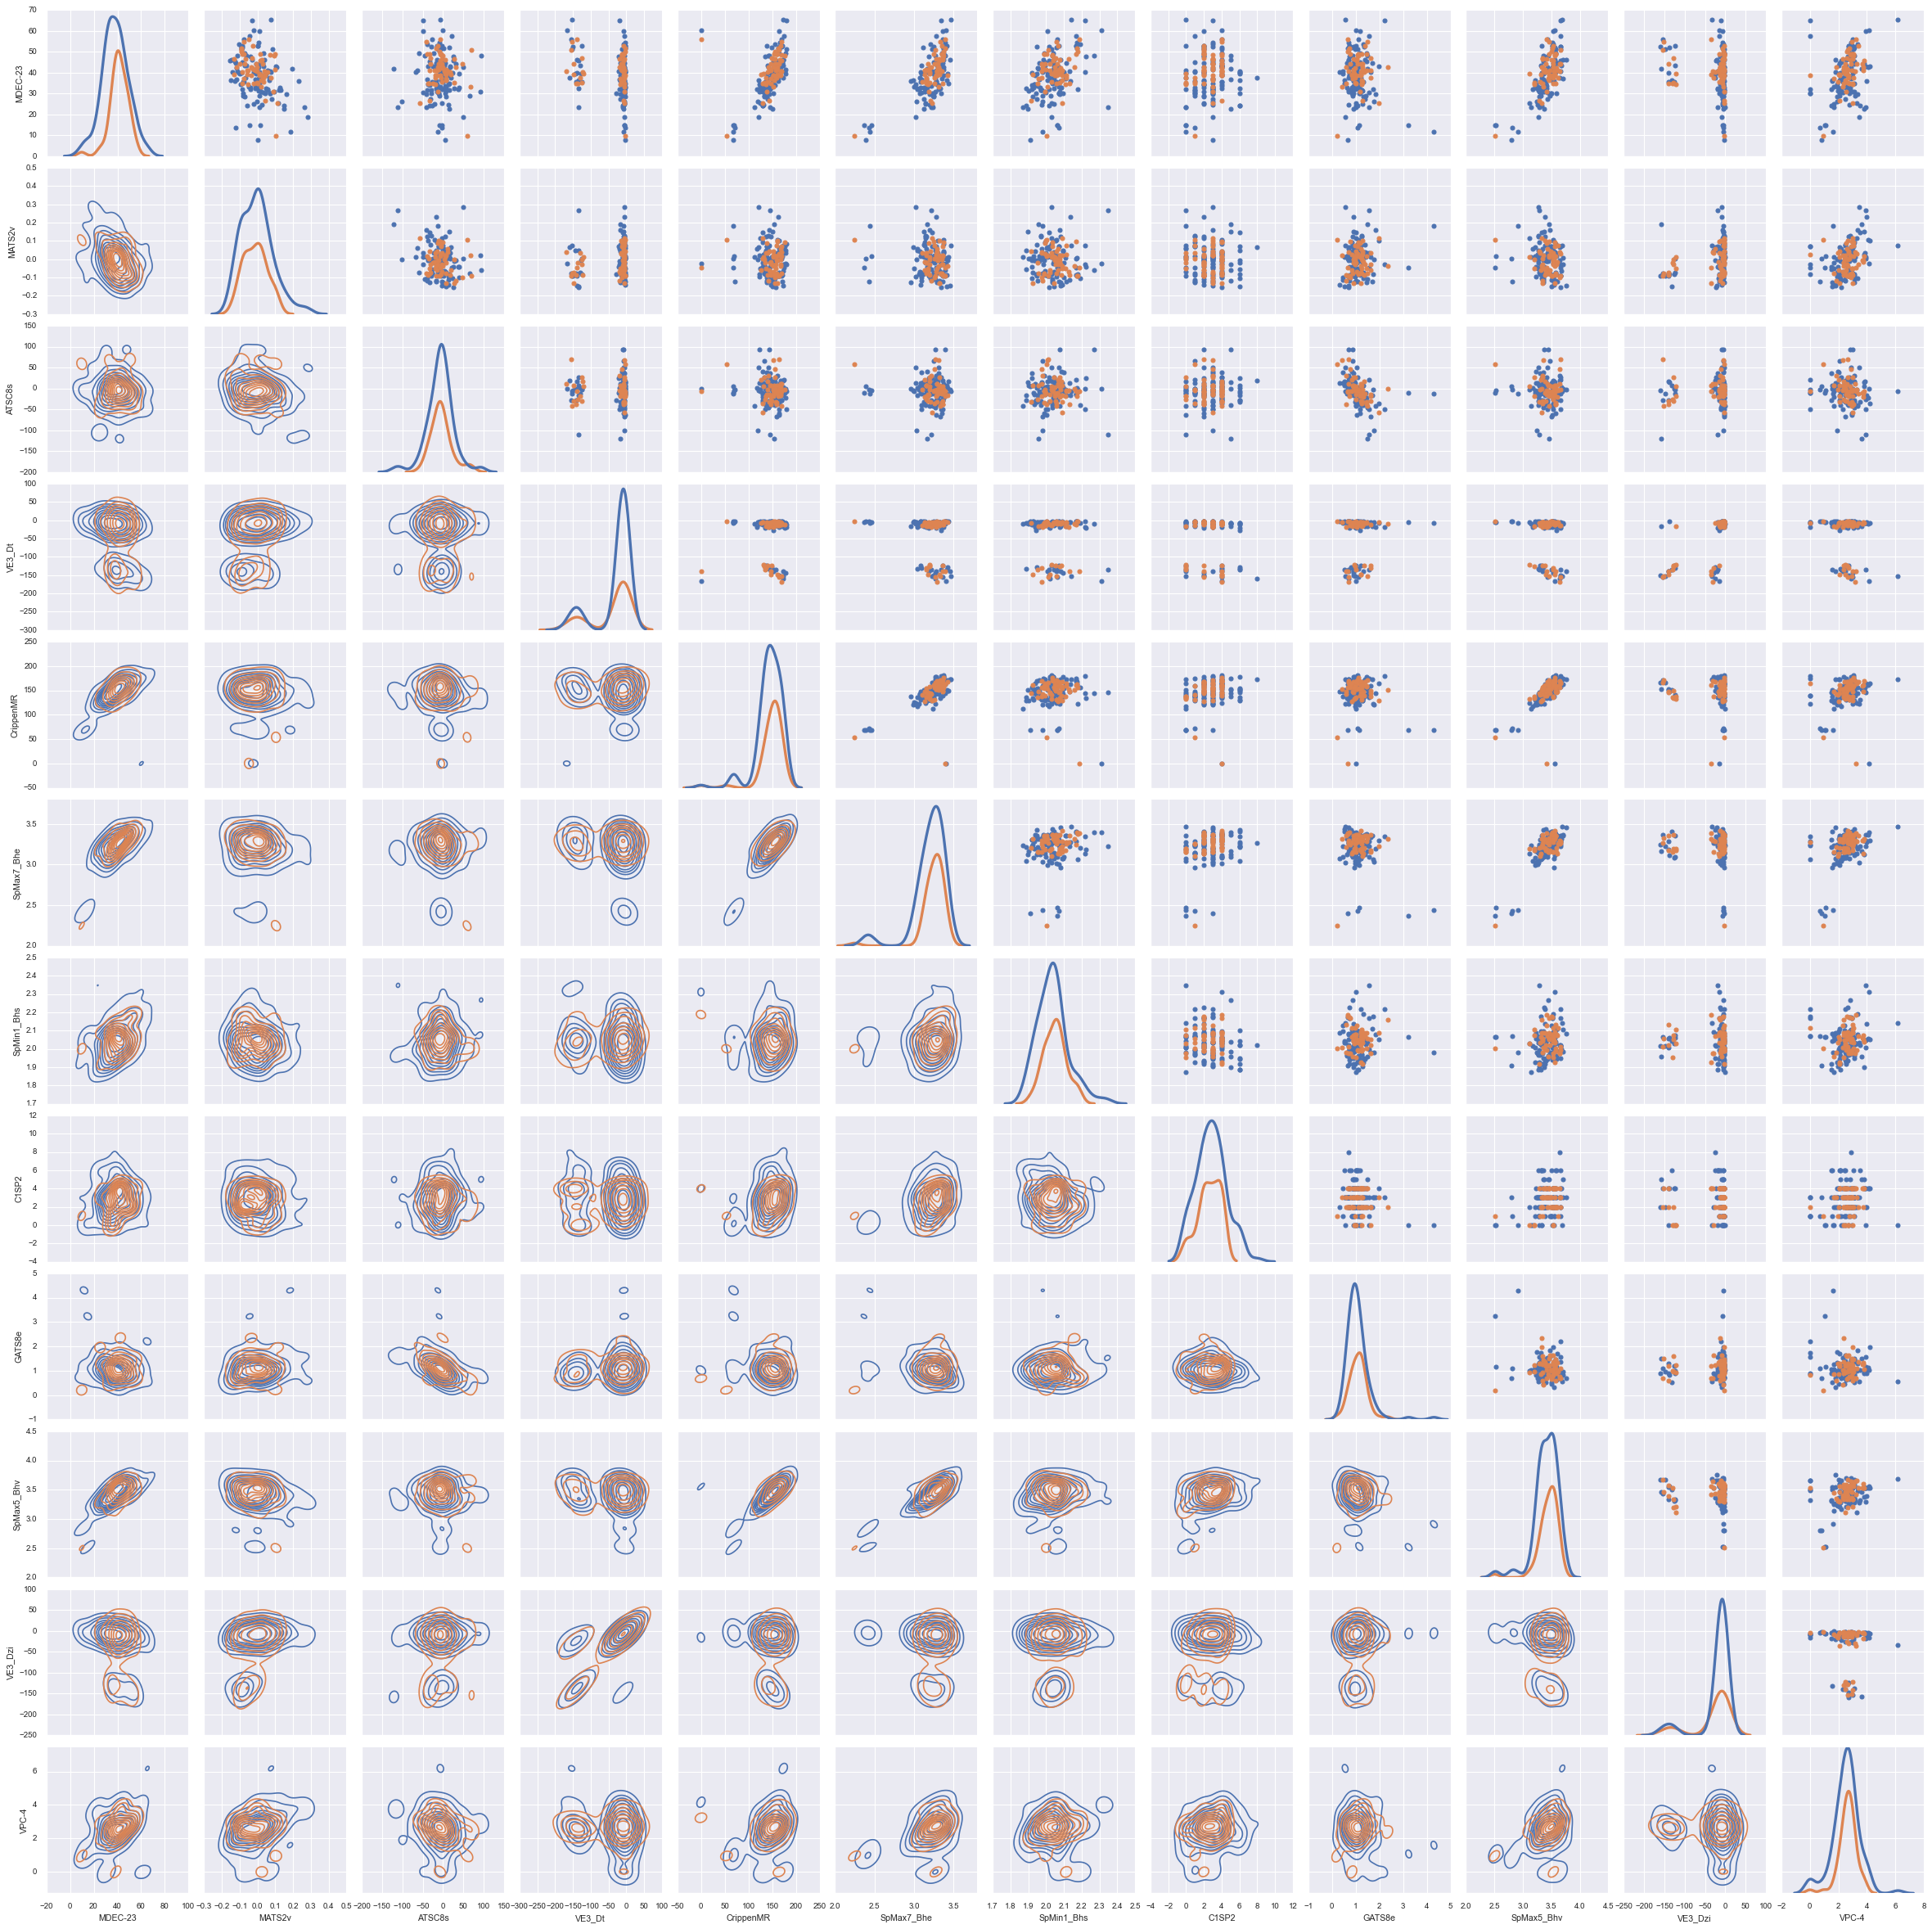

In [95]:
sns.set_theme(font_scale=0.8)

g = sns.PairGrid(df, x_vars=features, y_vars=features, hue="Class", diag_sharey=False)
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [7]:
#Заменим классы на 1 и 0
df.Class = df.Class.replace('Toxic', 1)
df.Class = df.Class.replace('NonToxic', 0)

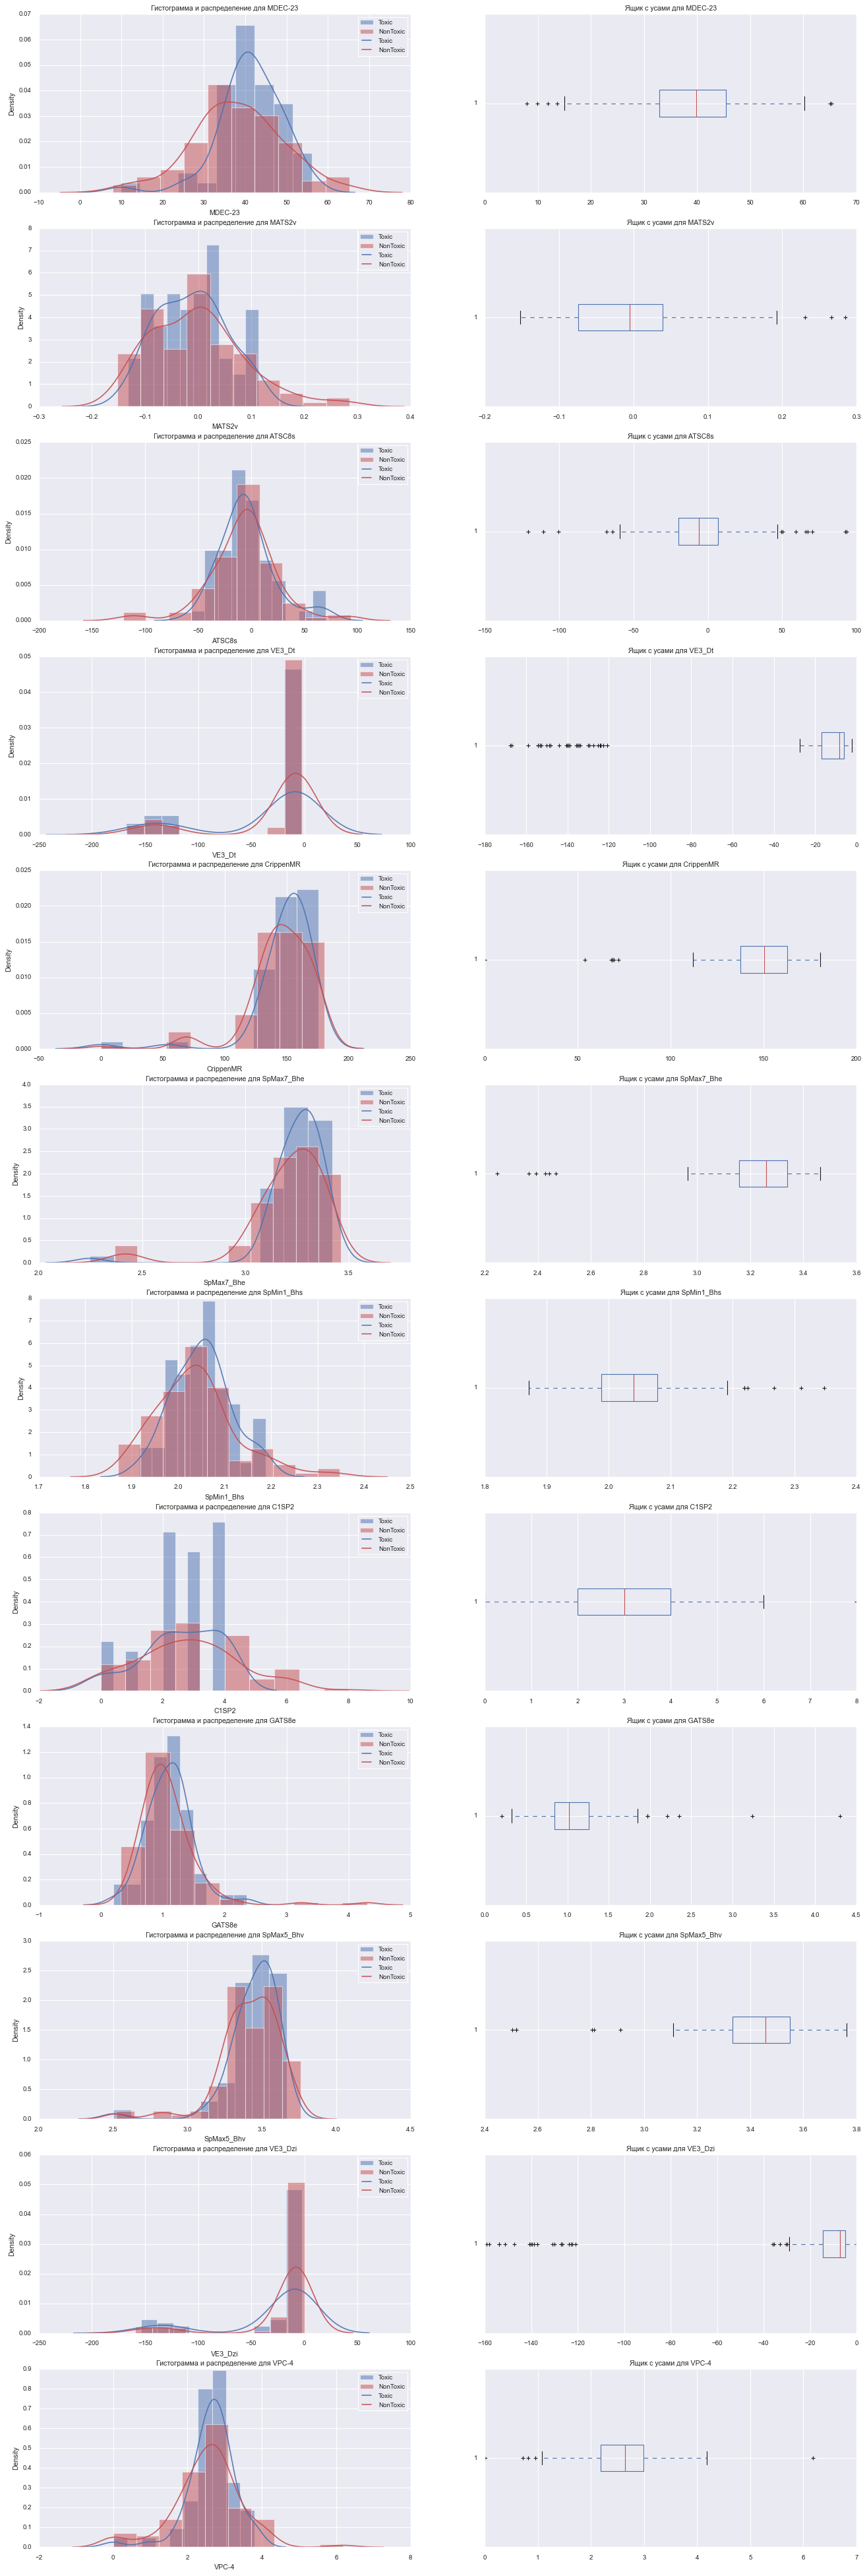

In [97]:
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize = (20, 60))
for i, param in enumerate(features):
    axes[i,0].hist(df[param][df.Class ==1], color = 'b', density = True, label = 'Toxic', alpha =0.5)
    axes[i,0].hist(df[param][df.Class ==0], color = 'r', density = True, label = 'NonToxic', alpha =0.5)
    sns.kdeplot(df[param][df.Class ==1], label = 'Toxic', color = 'b', ax = axes[i,0], alpha =0.9)
    sns.kdeplot(df[param][df.Class ==0], label = 'NonToxic', color = 'r', ax = axes[i,0], alpha =0.9)
    axes[i,0].set_title('Гистограмма и распределение для '+param)    
    axes[i,0].legend()

    axes[i,1].boxplot(df[param], vert = False)
    axes[i,1].set_title('Ящик с усами для '+param)
plt.show()

**Выводы:**

Для VE3D, VE3zi, CrippenMR(менее выражено), SpMax7_Bhe(менее выражено) большое количество элементов, которые находятся за пределами "ящика с усами", что может говорить о том, что эти элементы из другого распределения, поэтому их нужно рассмотреть отдельно. Класса 'NonToxic' больше в 2 раза, чем 'Toxic'. Это необходимо учесть при обучении модели.

## Предобработка данных

В этом разделе ожидается, что вы обработаете пропуски (если они есть) с помощью линейной регрессии, а выбросы (если они есть) обработайте способом на ваше усмотрение. Для оценки качества обработки пропусков используйте метрику MAPE.

Выше получили, что пропусков нет. Можно было предположить, что пропуски обозначают "0", но из графиков плотности выше можно сказать, что это часть распределения. Поэтому я верю, что там нет пропусков.

Выкидывать данные вручную может привести к тому, что я могу выкинуть элементы, которые не являются выбросами(как было написано ранее, есть данные из других распределений, которые выходят за "коробку с усами"). Скорее всего, тогда я удалю большую часть датасета. Поэтому для цели поиска выбросов воспользуюсь изолирующим деревом.

In [114]:
df.shape

(171, 13)

In [8]:
iso = IsolationForest()
y_outliers = iso.fit_predict(df)

In [9]:
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        df.drop(i, inplace = True)

In [10]:
df.shape

(147, 13)

С помощью изолирующего дерева мы уменьшили датасет на 35 элементов.

<Axes: xlabel='Class', ylabel='Count'>

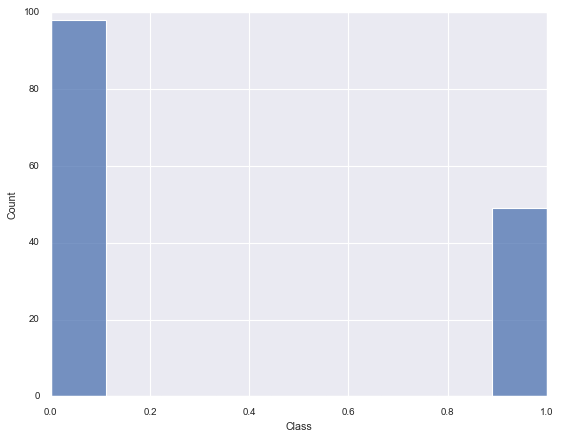

In [118]:
sns.histplot(df.Class)

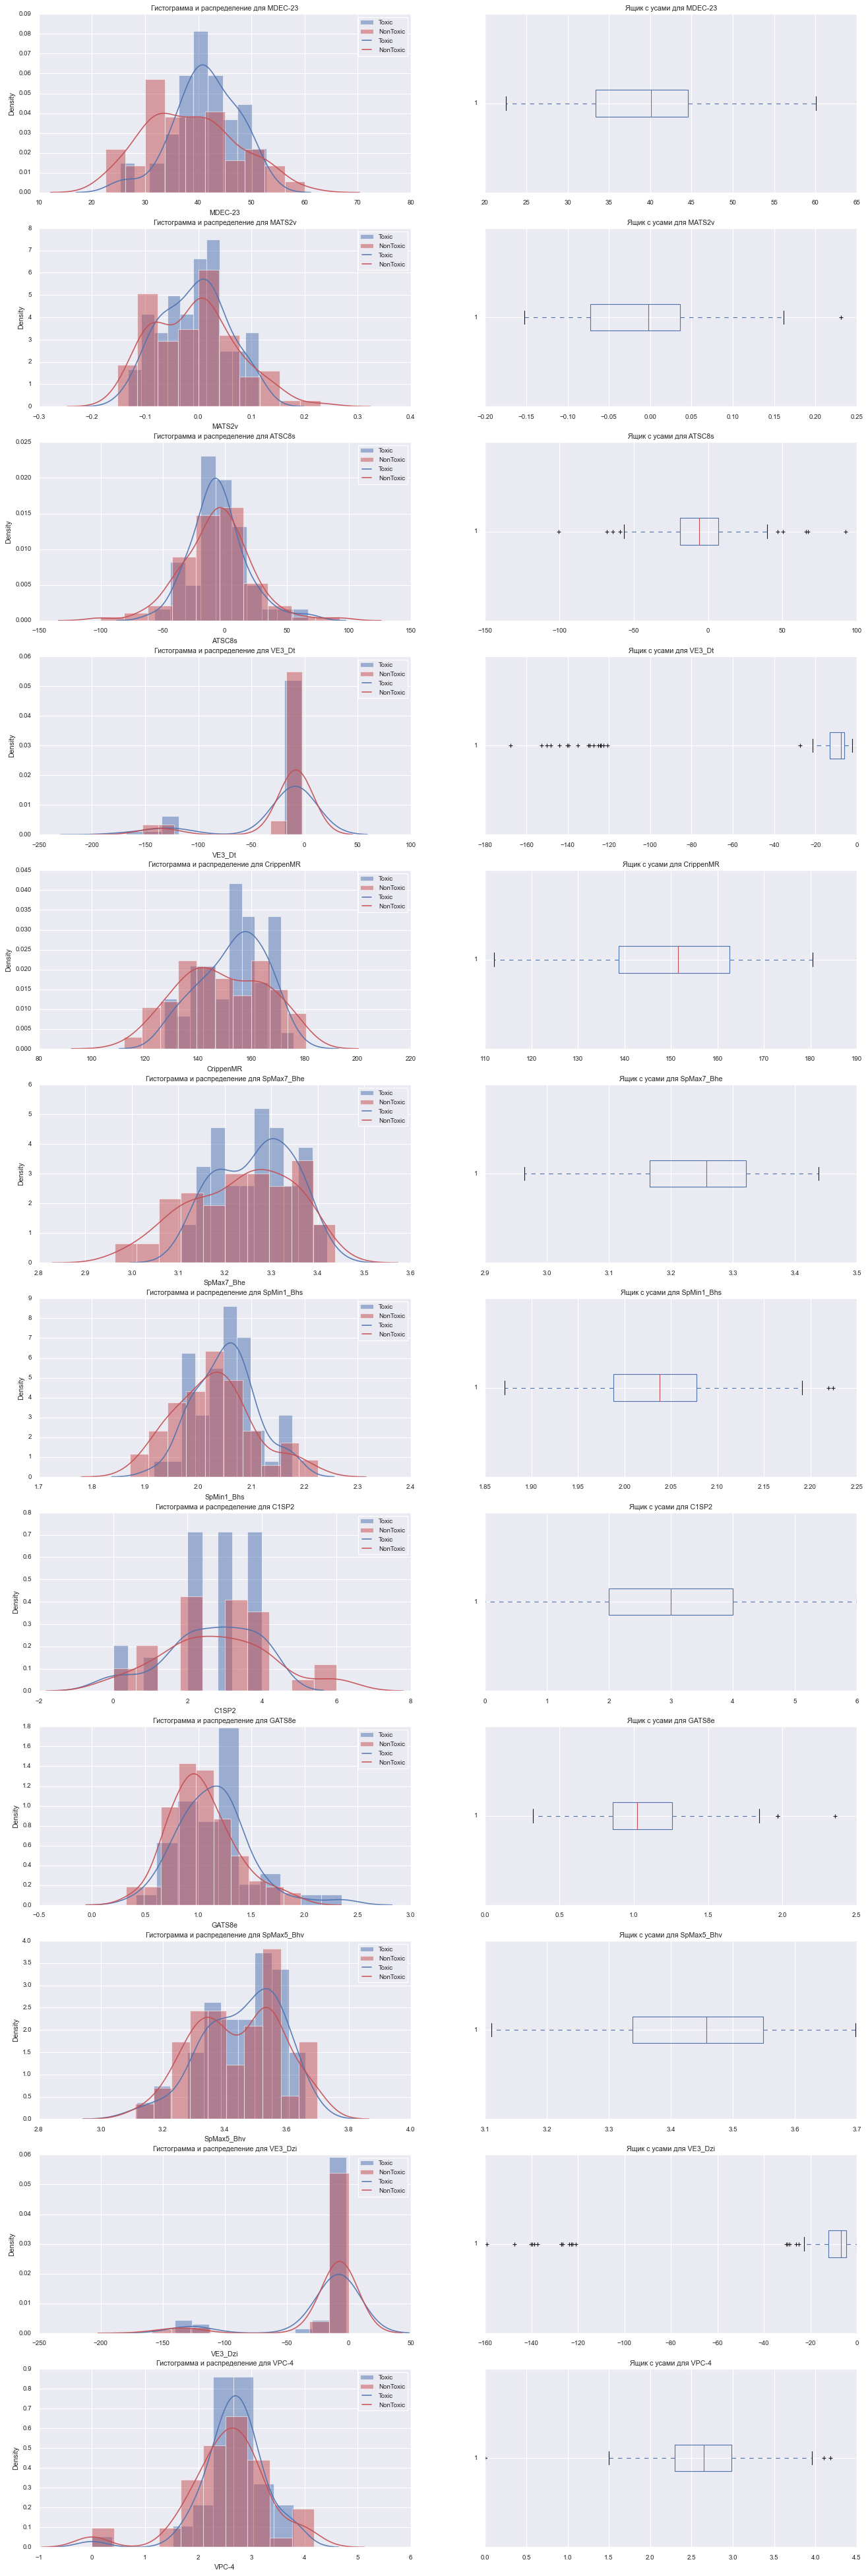

In [119]:
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize = (20, 60))
for i, param in enumerate(features):
    axes[i,0].hist(df[param][df.Class ==1], color = 'b', density = True, label = 'Toxic', alpha =0.5)
    axes[i,0].hist(df[param][df.Class ==0], color = 'r', density = True, label = 'NonToxic', alpha =0.5)
    sns.kdeplot(df[param][df.Class ==1], label = 'Toxic', color = 'b', ax = axes[i,0], alpha =0.9)
    sns.kdeplot(df[param][df.Class ==0], label = 'NonToxic', color = 'r', ax = axes[i,0], alpha =0.9)
    axes[i,0].set_title('Гистограмма и распределение для '+param)    
    axes[i,0].legend()

    axes[i,1].boxplot(df[param], vert = False)
    axes[i,1].set_title('Ящик с усами для ' + param)
plt.show()

Таким образом, я избавился от большого количества выбросов, сохранив вид распределений.

## Обучение моделей

In [ ]:
#Для предварительного обучения выберите первые  N <= 100000 строк, обучение лучшей модели можете произвести на всем датасете

#для теста используйте 30% выборки, размер валидационной выборки выберите на ваше усмотрение

In [106]:
X = df[features]
y = df.Class

In [107]:
#разделим на тренировочную выборку и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    # *arrays: принимает индексируемые объекты с совпадающей shape[0]. 
    # Например: list, np.array, pd.DataFrame.
    X, y,
    test_size=0.3, # доля данных, которые берем в тестовую выборку
    random_state=0, # фиксируем случайность
    shuffle=True, # перемешивает данные в случайном порядке 
    # сохраняем доли классов при разбиении как в таргете
    stratify=y
)

In [116]:
#зададим веса классам
weight0 = len(y)/(2*(y == 0).sum())
weight1 = len(X)/(2*(y == 1).sum())
class_weights = {0: weight0, 1: weight1}

Таким образом, я сохранил соотношения классов в разных подвыборках.

### DecisionTreeClassifier

In [15]:
params = {
    'max_depth': range(1, 20),
    'min_samples_split': range(1, 20),
    'min_samples_leaf': range(1, 20),
    'max_features': range(1, 20)

}
modelCV = GridSearchCV(estimator= DecisionTreeClassifier(criterion='log_loss'), param_grid = params)
modelCV.fit(X_train, y_train)

print('Лучшие параметры', modelCV.best_params_)

Лучшие параметры {'max_depth': 16, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [160]:
tree_model = DecisionTreeClassifier(max_depth=16, max_features= 3, min_samples_leaf=2, min_samples_split= 3, class_weight = class_weights)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [307]:
scores = []

In [308]:
scores.append(f1_score(y_test, tree_pred))
print(round(f1_score(y_test, tree_pred), 4))

0.4571


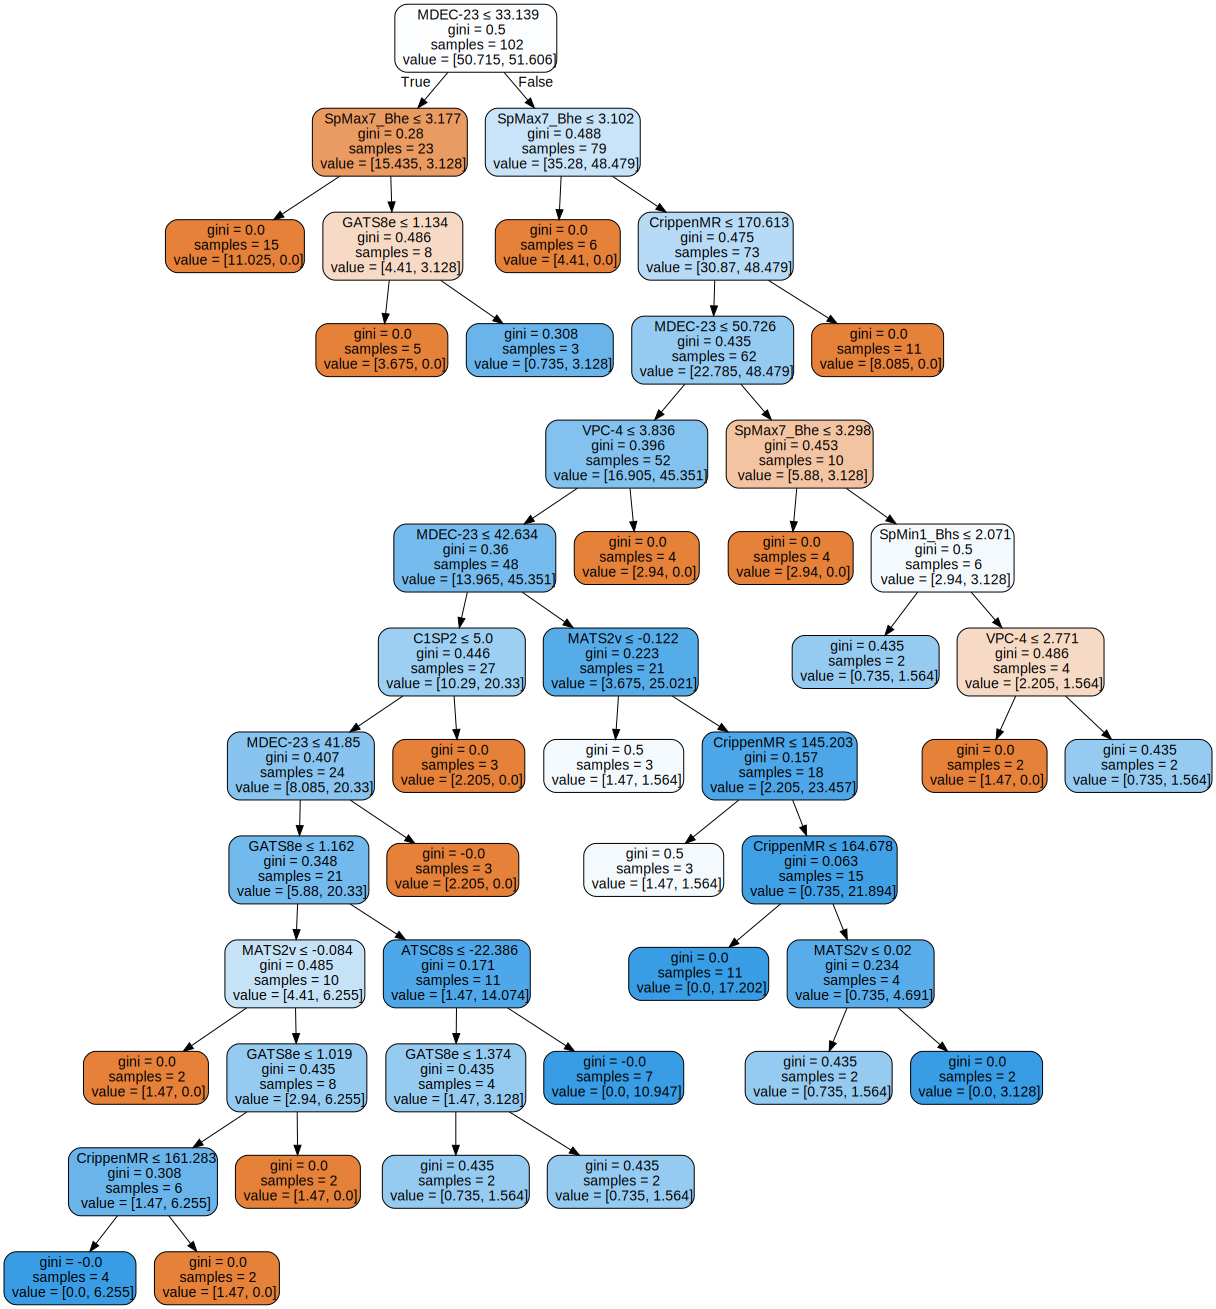

In [168]:
dot_data = export_graphviz(
        tree_model, out_file=None, 
        feature_names=X.columns, 
        filled=True, rounded=True, special_characters=True
    )  
graphviz.Source(dot_data) 

**Выводы:**

В данном разделе я обучил решающее дерево, предварительно с помощью GridSearch нашёл оптимальные гиперпараметры для данной модели. Метрика показывает, что модель предсказывает со "средней" точностью.

Дерево очень похоже на то, что было в статье.

### RandomForestClassifier

In [89]:
paramsF = {
    'max_depth': range(15, 17),
    'min_samples_split': range(2, 4),
    'min_samples_leaf': range(1, 3),
    'max_features': range(1, 3),
    'n_estimators': range(100, 200)
}
modelCVF = GridSearchCV(estimator= RandomForestClassifier(criterion='log_loss'), param_grid = paramsF, n_jobs= -1)
modelCVF.fit(X_train, y_train)

print('Лучшие параметры', modelCVF.best_params_)

Лучшие параметры {'max_depth': 16, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 134}


In [163]:
#обучение и предсказание
forest_model = RandomForestClassifier(n_estimators=134, max_depth=16, max_features= 2, min_samples_leaf=1, min_samples_split= 3, class_weight= class_weights)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

In [309]:
#вывод метрики
scores.append(f1_score(y_test, forest_pred))
print(round(f1_score(y_test, forest_pred), 4))

0.5455


**Выводы:**

В данном разделе я зафиксировал оптимальные параметры для одного дерева(точнее поставил диапазон +-1 и искал оптимальное количество деревьев в лесу). После этого обучил модель и сделал предсказания.
Как ожидалось, лес предсказывает лучше, чем одно дерево, однако всё ещё "средне". 

### LogisticRegression

In [128]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
#поиск лучших гиперпараметров
paramslin = {
    'l1_ratio': np.logspace(-10, 10)
}
modelCV_lin = GridSearchCV(estimator= LogisticRegression(), param_grid = paramslin, n_jobs= -1)
modelCV_lin.fit(X_train_scaled, y_train)

print('Лучшие параметры', modelCV_lin.best_params_)

Лучшие параметры {'l1_ratio': 1e-10}


In [141]:
lin_model = LogisticRegression(class_weight=class_weights, l1_ratio= 0)

In [142]:
lin_model.fit(X_train_scaled, y_train)
lin_pred = lin_model.predict(X_test_scaled)

In [310]:
#вывод метрики
scores.append(f1_score(y_test, lin_pred))
print(round(f1_score(y_test, lin_pred), 4))

0.303


**Выводы:**

Здесь я стандартизировал данные перед тем, как обучить модель логистической регрессии. Гридсёрч показал, что оптимальный параметр для этой модели l1 = 0. То есть при регуляризации l2. 

Модель предсказывает много хуже, чем решающее дерево и лес, что логично вытекает из графиков выше(слабая корреляция между признаками). Тем более на некоторых признаках 2 распределения.

### KNeighborsClassifier

In [96]:
paramsKN = {
    'n_neighbors': range(1, 10)
}
modelCV_KN = GridSearchCV(estimator= KNeighborsClassifier(), param_grid = paramsKN, n_jobs= -1)
modelCV_KN.fit(X_train, y_train)

print('Лучшие параметры', modelCV_KN.best_params_)

Лучшие параметры {'n_neighbors': 2}


In [149]:
model_kn = KNeighborsClassifier(n_neighbors = 2)
model_kn.fit(X_train, y_train)
kn_pred = model_kn.predict(X_test)

In [311]:
scores.append(f1_score(y_test, kn_pred))
print(round(f1_score(y_test, kn_pred), 4))

0.2727


**Выводы:**

Здесь я попробовал поискать оптимальное количество соседей для своих данных. Как видно, даже оптимальный гиперпараметр выдаёт низкое значение метрики. Возможно, я мог не учесть какие-то аспекты этой модели, т.к. её не было в курсе. Но думаю, что для этого датасета модель подходит плохо.

Предполагаю, что у неё аналогичная проблема, что и у регрессии: есть признаки с несколькими распределениями, слабая корреляция между признаками.

### Нейронная сеть

В этом разделе предлагается самостоятельно создать и обучить нейронную сеть, про интересные структуры вы можете посмотреть на последней странице статьи.

In [257]:
#Разделим тренировочную выборку на валидационную и тренировочную
X_train_NN, X_val, y_train_NN, y_val = train_test_split(
    # *arrays: принимает индексируемые объекты с совпадающей shape[0]. 
    # Например: list, np.array, pd.DataFrame.
    X, y,
    test_size=0.3, # доля данных, которые берем в тестовую выборку
    random_state=0, # фиксируем случайность
    shuffle=True, # перемешивает данные в случайном порядке 
    # сохраняем доли классов при разбиении как в таргете
    stratify=y
)

In [258]:
#стандартизируем данные:
X_train_NN = scaler.fit_transform(X_train_NN)
X_val = scaler.transform(X_val)
X_test_NN = scaler.transform(X_test)

In [259]:
#преобразуем данные в одинаковый формат
X_train_NN = torch.from_numpy(X_train_NN).float()
y_train_NN = torch.from_numpy(y_train_NN.values).float().unsqueeze(1)

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val.values).float().unsqueeze(1)

X_test_NN = torch.from_numpy(X_test_NN).float()
y_test_NN = torch.from_numpy(y_test.values).float().unsqueeze(1)

In [260]:
X_train_NN.shape

torch.Size([102, 12])

In [297]:
model_NN = nn.Sequential(
    nn.Linear(in_features= 12, out_features= 12),
    nn.Sigmoid(),
    nn.Linear(in_features= 12, out_features= 1),
    nn.Sigmoid())

for name, param in model_NN.named_parameters():
    param.X = torch.FloatTensor(np.ones(13))
model_NN[0].weight

Parameter containing:
tensor([[-0.0094,  0.0725, -0.1123,  0.0296, -0.1099,  0.1288,  0.1902,  0.2540,
         -0.1801, -0.2655, -0.2186,  0.2739],
        [-0.0443, -0.0201, -0.1583,  0.0176, -0.2807, -0.2313,  0.2297, -0.1392,
         -0.0852,  0.0377,  0.2422, -0.1354],
        [-0.1735, -0.0087,  0.0725,  0.0868,  0.0583,  0.2501,  0.0167, -0.1758,
          0.2797, -0.0690,  0.0713, -0.0231],
        [ 0.0342, -0.2372,  0.0533,  0.2415, -0.0550, -0.1252, -0.0236, -0.0034,
         -0.0970, -0.2667, -0.1383,  0.0840],
        [-0.2585,  0.1848,  0.0934,  0.2722,  0.1915,  0.2822, -0.0363, -0.1909,
         -0.1646, -0.1179,  0.2702, -0.1670],
        [-0.1756, -0.0737,  0.0236,  0.2046,  0.2404, -0.1723,  0.1635, -0.1070,
          0.2050,  0.1432, -0.1732, -0.1234],
        [ 0.1035, -0.1472, -0.0332,  0.2768, -0.1773, -0.2416,  0.2152, -0.0453,
          0.0252,  0.0505, -0.2766, -0.2860],
        [ 0.1540, -0.2158,  0.0429, -0.2213,  0.2510, -0.0339, -0.0831,  0.0701,
        

In [298]:
optim_func = nn.BCELoss()
optimizer = optim.SGD(model_NN.parameters(), lr=0.5)

In [299]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('Эпоха',    fontsize=fontsize)
    plt.grid()
    plt.legend()
    plt.show()

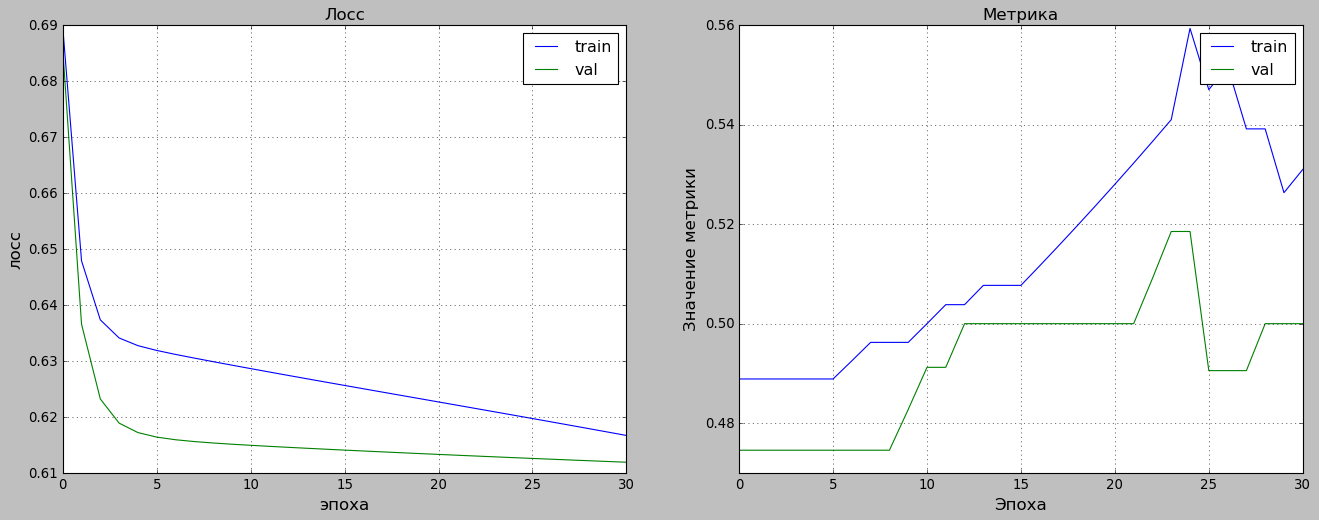

Обучение остановлено


In [300]:
#обучение Нейросети
num_iter = 200
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}
counter = 0
best_val_f1 = 0
for i in range(num_iter):

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = model_NN(X_train_NN)
    with torch.no_grad():
        y_pred_val = model_NN(X_val)


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = optim_func(y_pred_train, y_train_NN)
    with torch.no_grad():
        loss_val = optim_func(y_pred_val, y_val)

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss_train.backward()


    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    #зададим вероятность как 0.3
    y_pred_train = (y_pred_train >= 0.3)
    y_pred_val = (y_pred_val >= 0.3)
    metric_train = f1_score(y_train_NN.detach().numpy(), y_pred_train.detach().numpy())
    metric_val = f1_score(y_val.detach().numpy(), y_pred_val.detach().numpy())

    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)
    
    
    if i == 1:
        best_val_f1 = metric_val
    elif best_val_f1 < metric_val:
        counter = 0
        best_val_f1 = metric_val
    elif best_val_f1 > metric_val:
        counter += 1
        if counter > 6:
            print('Обучение остановлено')
            break
            
    

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)

**Модель жОско переобучалась, что видно по картинке ниже. Поэтому я решил добавить критерий, который остановит обучение нейронки преждевременно.**

**ПЕРЕОБУЧЕНИЕ**
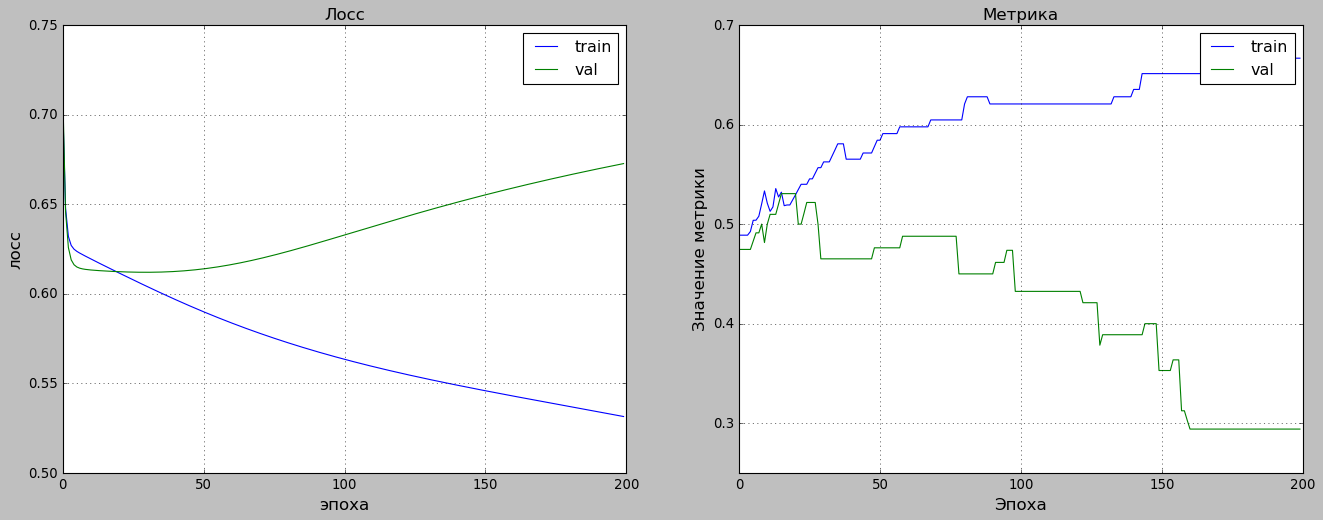

In [304]:
# Установка модели в режим оценки
model_NN.eval()

NN_pred = []

# Проход по тестовому набору данных
with torch.no_grad():
    for tests in X_test_NN:

        # Применение модели к тестовым данным
        outputs = model_NN(tests)
        
        # Получение предсказаний
        prediction = (outputs >= 0.3).int()

        NN_pred.extend(prediction.numpy())

In [312]:
scores.append(f1_score(y_test, NN_pred))
print(round(f1_score(y_test, NN_pred), 4))

0.4706


In [319]:
results = {
    ' ': ['f1_score'],
    'DecisionTreeClassifier': [scores[0]],
    'RandomForestClassifier': [scores[1]],
    'LogisticRegression': [scores[2]],
    'KNeighborsClassifier': [scores[3]],
    'Нейронная сеть': [scores[4]]
}
results = pd.DataFrame(results)
results

,,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier,Нейронная сеть
0,f1_score,0.457143,0.545455,0.30303,0.272727,0.470588


## Анализ полученных результатов и выводы по задаче

**Выводы:**

При предобработке были выделены следующие факты: соотношение классов в датасете 1:2, что влияет на обучение модели, из-за чего я задавал веса классов вручную; в распределениях признаков была найдена особенность наличия 2ух распределений, возможно, из разных семейств(подробно я это не исследовал из-за недостатка времени); выбросы были удалены с помощью изолирующего дерева, т.к. был велик риск, что при сортировке за счёт квартилей потеряется большое количество данных.

Судя по таблице с метрикой выше, наилучшей моделью для данного датасета является случайный лес(метрика f1_score). При этом в статье говорилось, что лучший результат достигался с помощью решающего дерева. Если сравнить гиперпараметры, то отличие в max_features. Возможно, это связано c рандомом(если несколько раз обучать модель, то метрика будет отличаться) либо моей ошибкой, т.к. я не варьировал гиперпараметры вручную, а лишь выбрал диапазон для поиска в GridSearch, и удалил часть выбросов(возможно, авторы статьи этого не делали).

Про недостатки остальных моделей было сказано выше. Предполагаю, что низкое качество метрики связано с особенностями данных(смотреть выше).

Во время обучения нейросети я обнаружил переобучение модели. Выбрал наиболее простой способ для предотвращения этого: остановку, если метрика начнёт падать больше 6 раз подряд.

Таким образом, моя модель может предсказать токсичную молекулу с 54% точностью.